# Generate plots shown in the paper for wav2vec-base

Plot Gender data function - Wav2Vec-Base


In [1]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

tab_colors = list(mcolors.TABLEAU_COLORS.keys())
print(tab_colors)
tab_colors.remove("tab:red")
plt.rcParams.update({'font.size': 12})
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

def plot_gender(data, title, zoom=False, min_x=50, max_x=90):
    fig1, ax1 = plt.subplots(figsize=(7, 4))
    ax2 = ax1.twiny()
  
    max_y = 0
   
    min_y = 200
    uniform_locs = []
    uniform_labels = []
    lines = []
    labels = []
    for i, (d, label) in enumerate(data):
        label = label.replace("_", " ")   
        uniform_lines = False  
        color = tab_colors[i]
        if "Uniform" in label:
            marker="x"
            width=5
            linestyle="none"
            color = "tab:red"
            marker_width=2.25
        else:
            width=1.5
            marker = "."
            linestyle="dashed"
            marker_width=1.5
        d_csv = pd.read_csv(d, delimiter="|")
        df = pd.DataFrame(d_csv, columns=["model", "data","compressed_size", "acc", "avg_bit_depth"])
        df = df.sort_values(by=["compressed_size"])
        dx_max = df["compressed_size"].max()
        dx_min = df["compressed_size"].min()
        dy_max = df["acc"].max()
        dy_min = df["acc"].min()
        bits = df["avg_bit_depth"]
        # if dx_max > max_x: max_x = dx_max
        # if dx_min < min_x: min_x = dx_min
        # if dy_max > max_y: max_y = dy_max
        # if dy_min < min_y: min_y = dy_min
        x_axis = df["compressed_size"]

        y_axis = df["acc"]
        y_axis = np.clip(y_axis, a_max=100, a_min=0)
        x_axis = np.clip(x_axis, a_max=max_x, a_min=min_x)
        
        ax1.plot(x_axis, y_axis,label=label, linestyle=linestyle, marker=marker, c=color, linewidth=width, markeredgewidth=marker_width)
        if not uniform_lines and "Uniform" in label:
            plt.vlines(x=x_axis, ymin=5, ymax=100, colors="black", ls='dotted', lw=1)
            uniform_locs = x_axis
            uniform_labels = bits
            uniform_lines = True

            # if "uniform" in label:
            #     for x_p, x, y in zip(x_axis, df["avg_bits"], y_axis):
            #         plt.annotate(f"{x} bits", # this is the text
            #         (x_p,y), # these are the coordinates to position the label
            #         textcoords="offset points", # how to position the text
            #         xytext=(0,3), # distance from text to points (x,y)
            #         ha='center')
            # print(label, sum(y_axis)/len(x_axis))
            # print(len(x_axis))
            # df.plot(kind=graph_type,ax=ax1, x="compressed_size", y="acc", label=label, grid=True)
    
    
    #x1.set_title(title)
    # Change major ticks to show every 20.
    ax1.xaxis.set_major_locator(MultipleLocator(10))
    ax1.yaxis.set_major_locator(MultipleLocator(10))

    # Change minor ticks to show every 5. (20/4 = 5)
    ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax1.set_ylim(0, 105)

    # Turn grid on for both major and minor ticks and style minor slightly
    # differently.
    ax1.grid(which='major', color='#CCCCCC', linestyle='--')
    ax1.grid(which='minor', color='#CCCCCC', linestyle=':')

    #ax1.set_xticks(np.arange(58, 91, 4))
    ax1.set_xlabel('Model Size (MB)')
    #ax1.set_yticks(np.arange(5, 105, 10))
    ax1.set_ylabel('WER')
    #ax1.grid()

    ax1.axhline(y = 2.4, color = 'grey', linestyle = 'dashed', label="Full Precision")
    ax1.set_xlim(min_x, max_x)
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(uniform_locs)
    ax2.set_xticklabels(uniform_labels)
    ax2.set_xlabel(r"$\bar{b}$")

    handles, labels = ax1.get_legend_handles_labels()
    order = [5,1,3,2,0, 4,6]
    
    leg = ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc='upper right', bbox_to_anchor=(0.99, 0.99))
    leg.get_frame().set_linewidth(0.0)

    print(labels)
    leg.get_frame().set_alpha(None)
    leg.get_frame().set_facecolor((1, 1, 1, 1))
  
    # inset axes....:w

    if zoom:
        axins = ax1.inset_axes([0.5, 0.5, 0.47, 0.47])
    # sub region of the original image
        x1, x2, y1, y2 = 80, 98, 0, 8
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        axins.set_xticklabels(np.arange(80, 98, 1))
        axins.set_yticklabels(np.arange(3, 10, 0.5))
        axins.grid()
        ax1.indicate_inset_zoom(axins, edgecolor="black")


['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']


['MyQASR (F)', 'MyQASR-Cos (M)', 'Reversed', 'Uniform', 'Shuffled', 'MyQASR (M)', 'Full Precision']


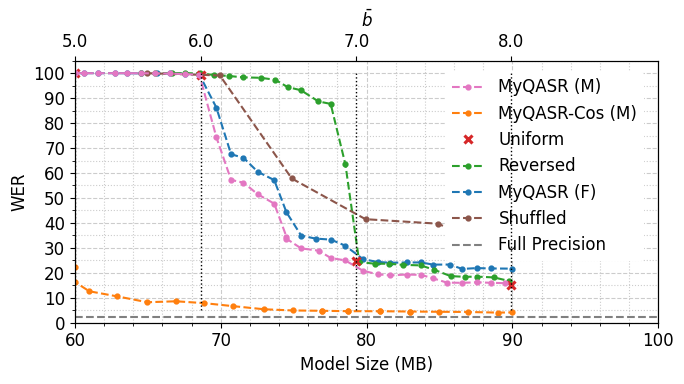

['myQASR (F)', 'myQASR-Cos (M)', 'Reversed', 'myQASR (M)', 'Uniform', 'Shuffled', 'myQASR-Cos (F)', 'Full Precision']


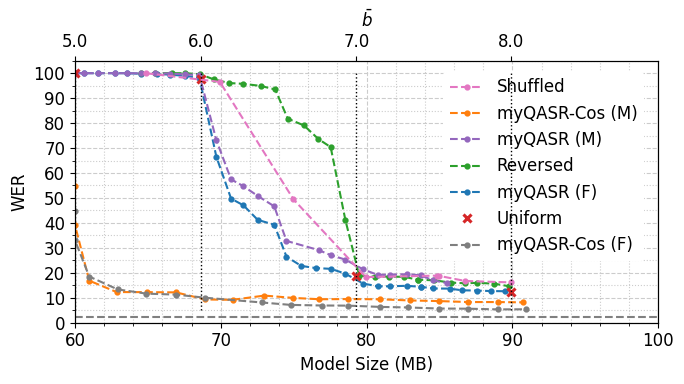

In [2]:

import os
import pandas as pd
genders = ["male", "female"]

def create_paths(root_path):
    labels = os.listdir(root_path)
    labels_clean = [l.replace(".csv", "") for l in labels]

    paths = [root_path + f"/{l}" for l in labels]
    data_labels = [(p, l) for p, l in zip(paths, labels_clean)]
    return data_labels
    #plt.savefig(f"{lang}.png")

for g in genders:
    path = f"../results/wav2vec-base/{g}"
    files = create_paths(path) 
    plot_gender(files, f"Wav2Vec2-Base Male Test Data", zoom=False, min_x=60, max_x=100)
    plt.tight_layout()
    plt.savefig(f"../results/figures/{g}.png")
    plt.show()

    